In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

from os.path import abspath, dirname, join
from os import getcwd


PARENT_DIR = dirname(getcwd())

with open(join(PARENT_DIR,'cultivar_models/Skyfall_Yield_model_daily_3d.pck'), 'rb') as pfile1:
    skyfall = pickle.load(pfile1)

df = pd.read_csv(join(PARENT_DIR, 'All_Cultivars_Spreadsheets/all_cultivars.csv'))

print(df)

# read in the weather, calculate avg weather for region/area/site/ year

      Cultivar            Region    Region County       Lat    Long  Year  \
0       Access             OLD'M             ABER  57.33492 -2.3199  2002   
1       Access            Ragnal  Nottinghamshire  53.25560 -0.7963  2004   
2       Access  Little Staughton     Bedfordshire  52.25040 -0.3821  2004   
3       Access          Limavady      Londonderry  55.04550 -6.9337  2003   
4       Access          Limavady           LDERRY  55.04550 -6.9337  2002   
...        ...               ...              ...       ...     ...   ...   
16861     Zulu               Wye             Kent  51.18190  0.9379  2015   
16862     Zulu            Callow           Herefd  52.00510 -2.7385  2017   
16863     Zulu            Morley            Norfk  52.55470  1.0396  2015   
16864     Zulu            Morley            Norfk  52.55470  1.0396  2016   
16865     Zulu          Balgonie             Fife  56.18430 -3.1244  2013   

      Sow Month  Ripe Time  Yield  
0          1/10      342.0   8.82  
1  

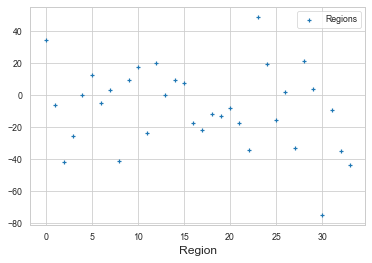

In [29]:
def plot_validation(simfarm):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(np.arange(simfarm.preds.size), simfarm.resi, marker="+", label="Regions") # the size of the yield predictions(gaussian)
    # ax.axhline(np.mean(simfarm.resi), linestyle="-", color="k", label="Mean")
    # ax.axhline(np.median(simfarm.resi), linestyle="--", color="k", label="Median")

    ax.set_xlabel("Region")
    # ax.set_ylabel("$1 - Y_{\mathrm{Pred}} / Y_{\mathrm{True}}$ (%)")

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)

    fig.savefig(
        join(
            PARENT_DIR, "scripts",
            f"Validation{simfarm.cult}.png"),
        bbox_inches="tight")

    return fig

# get the residual - mean


plot = plot_validation(skyfall)
plot.show()

## Regions are only seperate residuals, not connected to actual lat/long?? check order?, index  related 

plot = simfarm.preds.size

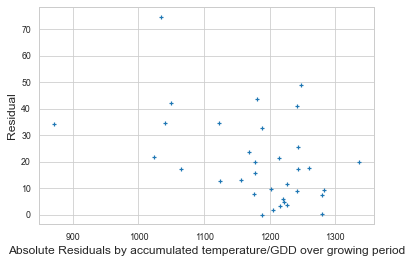

In [103]:
'''The residuals(how far off the prediction is) shown by the accumulated temperature units/GDD'''
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.scatter(np.arange(simfarm.preds.size), simfarm.resi, marker="+", label="Regions")  
# above copied from validation plaot for reference 'np.arange  equally spaces them where np.linespace does it better for decimals
ax.scatter(skyfall.predict_temp, abs(skyfall.resi), marker = '+')


# plt.hist(skyfall.predict_temp, label = 'validate')
ax.set_xlabel('Absolute Residuals by accumulated temperature/GDD over growing period')
ax.set_ylabel('Residual')
# plt.legend()

plt.show()

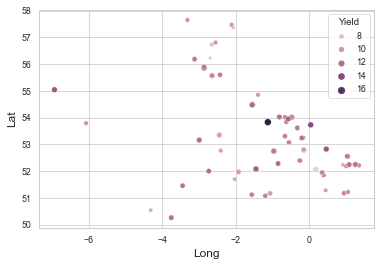

In [98]:
'''Find the regions of Skyfall, showing yield by Region'''

df = df[df.Cultivar == 'Skyfall']
# print(df)
sns.scatterplot(df.Long, df.Lat, size =df.Yield, hue=df.Yield)
plt.show()

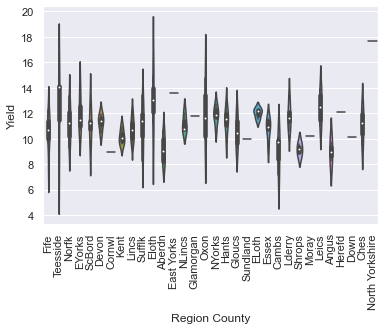

In [80]:
'''the Skyfall Yields by location'''
df = df[df.Cultivar == 'Skyfall']
# print(df)
# sns.scatterplot(df['Region County'], df.Yield, hue = df.Yield)
sns.violinplot('Region County', 'Yield', data = df)
plt.xticks(rotation=90)
plt.show()

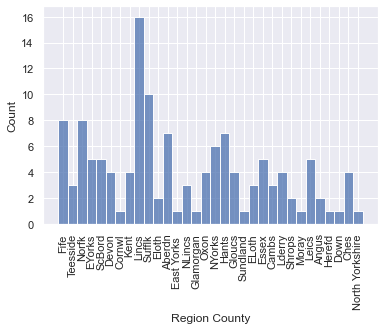

32


In [69]:
'''the unique region/counties of Skyfall'''
sns.histplot(data=df, x=df['Region County'])
plt.xticks(rotation = 90)
plt.show()
a = df['Region County'].unique()
print(len(a))

In [36]:
'''the different between 1 - predicted/observed
so when the prediction is the same as the observed it will be 0'''
def print_yield(simfarm):
    simfarm.preds

print(skyfall.resi.head(10))


14281    34.486092
14328    -6.087726
14300   -41.950269
14271   -25.353731
14287    -0.061146
14309    12.584835
14288    -4.686850
14292     3.347938
14244   -41.155819
14294     9.254797
Name: Yield, dtype: float64


In [93]:
'''Yield predictions for Skyfall using trained parameters with each of the 34 (30%)data points from the cultivar ccsv for validation. '''
print(skyfall.preds)

[ 7.8420148  11.8712165  13.98210147 11.63282626 10.7865915   9.5195115
 12.53101593 11.03766552 11.67358626 10.49921993 10.78253678 12.17447504
  9.82467626 10.46890455 10.97423846 11.15231915 12.11867804 11.60444435
 11.81986961 12.03630175 12.97453508 12.887099   13.54116964  9.0116527
 10.22209232 12.37715639 12.35346997 11.85115336  8.33471047 11.08187239
 13.38843324 10.65113023 11.24838001 12.96306784]


In [37]:
import simfarm
type(skyfall.predict_yields)
print(skyfall.predict_yields.head())
print(len(skyfall.predict_yields))

14281    11.97
14328    11.19
14300     9.85
14271     9.28
14287    10.78
Name: Yield, dtype: float64
34


In [38]:
df = df[df.Cultivar =='Skyfall']
orig_yields = df.Yield.filter(items=skyfall.predict_yields.index, axis=0) # keep only the index values that match
orig_yields_2 = df.Yield[skyfall.predict_yields.index] # index into df.Yield using predict_yield index i.e without filter
print(pd.Series.equals(orig_yields, skyfall.predict_yields))
comp = pd.Series.compare(orig_yields_2 *4 , skyfall.predict_yields)
print(comp.head())
print(len(comp))
# print(orig_yields_2)
# print(dir(comp)) # to get callable options


# print(skyfall.predict_yields.index)
type(df.Yield)
print(f'Residual Mean: {np.mean(skyfall.resi):.3f}')
print(f'Residual Median: {np.median(skyfall.predict_yields):.3f}')
#print(df.compare(df.Yield,skyfall.predict_yields)) <- wrong needed to be pd.series

True
        self  other
14281  47.88  11.97
14328  44.76  11.19
14300  39.40   9.85
14271  37.12   9.28
14287  43.12  10.78
34
Residual Mean: -7.801
Residual Median: 10.740


In [51]:
print(len(skyfall.train_yields)) # 70% for training
print(len(skyfall.predict_yields)) # 30% for validations
print(skyfall.yield_data)
print(skyfall.therm_days.shape) # showing its just 1d

98
34
14240    11.46
14281    11.97
14238    11.36
14252    10.47
14239     8.92
         ...  
14339     8.09
14307    10.68
14362     9.86
14353     9.03
14305    10.24
Name: Yield, Length: 132, dtype: float64
(132,)


In [64]:
rand_inds = np.random.choice(np.arange(skyfall.therm_days.size), int(skyfall.therm_days.size * 0.3)) # pick random sample of 30% in rang 0-132 (skyfall sample size)
okinds = np.zeros(skyfall.therm_days.size, dtype=bool)
print(okinds)
okinds[rand_inds] = True
print(rand_inds)
print(okinds) # boolean mask, filter on actual dataset

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
[106  87  82  67  71 111 109  90  25  58   5  46  44 109  31  49  90  11
  86  92 112  28  94  54 125  57   4  24  23 107  98  34  58 108  97  40
  28  52  60]
[False False False False  True  True

In [112]:
print(df.Year.unique()) # ALL SKYFALL values only contain these years
print(df.Region.unique()) # AND these regions
print(df.Region.unique().size)
print(df.shape)
print(df)

print(skyfall.preds.size)


[2015 2016 2013 2017 2014]
['Elie' 'Croft' 'Morley' 'Tibthorpe' 'StBosw' 'WCharlt' 'SClims' 'Wye'
 'Ulceby' 'Elmswell' 'GSturton' 'Humbie' 'Luthermr' 'Cowbridge' 'Alkerton'
 'Fridaythorpe' 'Barthorpe' 'Framling' 'Withernsea' 'Wolfertn' 'Welbourn'
 'Broughtn' 'Coates' 'Burdon' 'Stowmrkt' 'Barnston' 'Didbrook' 'Thaxted'
 'Ickleton' 'Spalding' 'Mendlesham' 'Bedfield' 'Baumber' 'Limavad'
 'Petham' 'Edgmond' 'Anstruth' 'Elgin' 'Frisby' 'Auchnagatt' 'Brechin'
 'Callow' 'Cawood' 'Sancton' 'Balgonie' 'Ccreevy' 'North Dalton'
 'Nether Wallop' 'Kelso' 'East Malling' 'Ellon' 'Hlegh' 'Burkham'
 'Deopham' 'Itchen Stoke' 'Hailes' 'Moulton' 'Pinchbeck' 'Frsthrp'
 'Saltoun']
60
(132, 9)
      Cultivar      Region Region County      Lat    Long  Year Sow Month  \
14233  Skyfall        Elie          Fife  52.3995 -0.2624  2015     13/10   
14234  Skyfall       Croft      Teesside  54.4835 -1.5551  2015      25/9   
14235  Skyfall      Morley         Norfk  52.5547  1.0396  2015      2/10   
14236  Skyfa

In [66]:
print(skyfall.predict_lat.head(), skyfall.predict_long.head())
print(skyfall.resi.head())

14281    50.2697
14328    51.1263
14300    51.2230
14271    51.7058
14287    51.8533
Name: Lat, dtype: float64 14281   -3.7556
14328   -1.5690
14300    1.0459
14271   -2.0325
14287    0.3865
Name: Long, dtype: float64
14281    34.486092
14328    -6.087726
14300   -41.950269
14271   -25.353731
14287    -0.061146
Name: Yield, dtype: float64


          self      other
14281  50.2697  34.486092
14328  51.1263  -6.087726
14300  51.2230 -41.950269
14271  51.7058 -25.353731
14287  51.8533  -0.061146


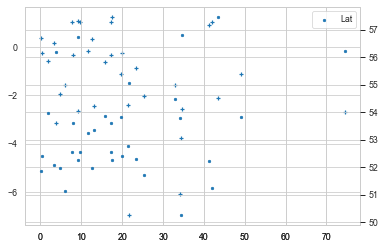

In [201]:
diff = pd.Series.compare(skyfall.predict_lat, skyfall.resi)
print(diff.head())

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
ax2.yaxis.tick_right()

ax1.scatter(abs(skyfall.resi), skyfall.predict_long, marker ='+', label='Long')
ax2.scatter(abs(skyfall.resi), skyfall.predict_lat, marker = '.', label='Lat')

plt.legend()
plt.show()


# https://thomas-cokelaer.info/blog/2012/04/481/
# ax2 = fig1.add_subplot(111, sharex=ax1, frameon=False)
# line2 = ax2.plot([10,40,20,30,50], 'xr-')
# ax2.yaxis.tick_right()
# ax2.yaxis.set_label_position("right")
# ylabel("Right Y-Axis Data")
 

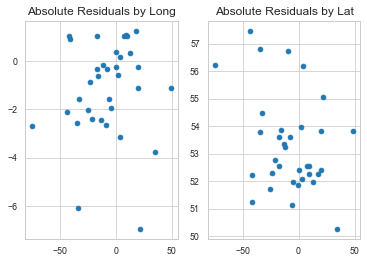

In [202]:
'''doing two axis with sns'''
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.scatter(skyfall.resi, skyfall.predict_long)
ax1.set_title('Absolute Residuals by Long')
ax2.scatter(skyfall.resi, skyfall.predict_lat)
ax2.set_title('Absolute Residuals by Lat')
plt.show()

# plot independent on x i.e lat /long, and see what you get(resi) on y

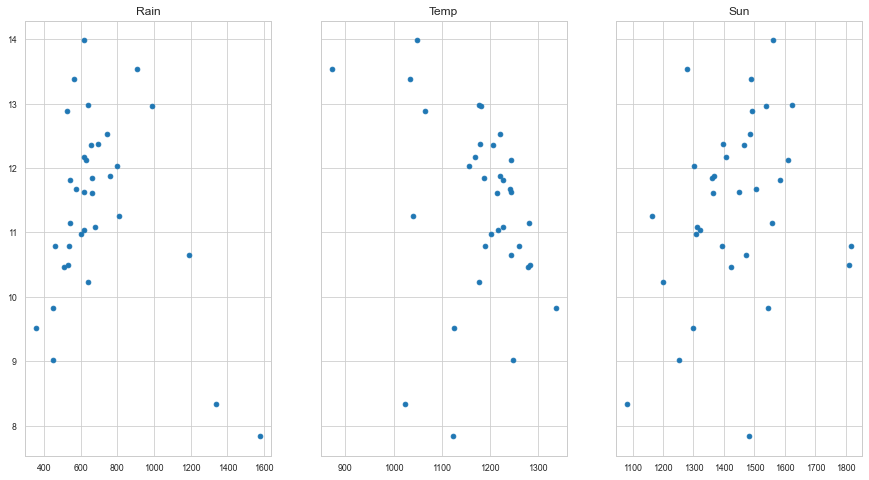

In [3]:
'''doing two axis with sns'''

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,  figsize= (15, 8))
ax1.scatter(skyfall.predict_rain, skyfall.preds)
# ax.lines(skyfall.predict_rain, skyfall.preds)
ax1.set_title('Rain')
ax2.scatter(skyfall.predict_temp, skyfall.preds)
ax2.set_title('Temp')
ax3.scatter(skyfall.predict_sun, skyfall.preds)
ax3.set_title('Sun')

#pearsons correlation - check datacamp
plt.show()